In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%reload_ext autoreload
%autoreload 2
from HelperFunctions import minibatch, down_sample

In [2]:
df=pd.read_csv('final_df.csv',index_col='id')
mybatch=minibatch(df)

/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,profit,RANDOM
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36,13.99,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,2003-08-01,30.0,-999.0,0.0,29.7,13.0,w,0.0,30.0,Individual,0.0,722.0,36.0,34.0,9300.0,4.0,0.0,0.0,3.0,2.0,0.0,3.0,76.9,0.0,0.0,178050.0,13734.0,677.0,137158.0,0.692308,0.230769,0.076923,0.555556,0.400000,0.444444,0.666667,0.444444,0.538462,37.566667,4421.723917,0.952901
68355089,24700.0,36,11.99,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,small_business,577xx,SD,16.06,1.0,1999-12-01,6.0,-999.0,0.0,19.2,38.0,w,0.0,-999.0,Individual,0.0,0.0,73.0,29.0,111800.0,6.0,0.0,0.0,2.0,0.0,0.0,2.0,97.4,0.0,0.0,314017.0,24667.0,717.0,164921.0,0.710526,0.157895,0.105263,0.629630,0.294118,0.185185,0.166667,0.740741,0.578947,6.100000,25679.660000,0.743162
68341763,20000.0,60,10.78,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,2015-12-01,Fully Paid,home_improvement,605xx,IL,10.78,0.0,2000-08-01,-999.0,-999.0,0.0,56.2,18.0,w,0.0,-999.0,Joint App,0.0,0.0,73.0,65.0,14000.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,100.0,0.0,0.0,218418.0,14877.0,697.0,171003.0,0.388889,0.333333,0.277778,0.571429,0.500000,0.428571,0.166667,0.571429,0.333333,18.266667,22705.924294,0.119479
68476807,10400.0,60,22.45,F,F1,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,major_purchase,174xx,PA,25.37,1.0,1998-06-01,12.0,-999.0,0.0,64.5,35.0,w,0.0,-999.0,Individual,0.0,0.0,84.0,78.0,34000.0,3.0,0.0,0.0,4.0,0.0,0.0,4.0,96.6,0.0,0.0,439570.0,88097.0,697.0,235962.0,0.542857,0.285714,0.171429,0.473684,0.444444,0.315789,0.300000,0.368421,0.342857,7.100000,11740.500000,0.731115
68426831,11950.0,36,13.44,C,C3,4 years,RENT,34000.0,Source Verified,2015-12-01,Fully Paid,debt_consolidation,300xx,GA,10.20,0.0,1987-10-01,-999.0,-999.0,0.0,68.4,6.0,w,0.0,-999.0,Individual,0.0,0.0,99.0,76.0,12900.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,100.0,0.0,0.0,16900.0,4000.0,692.0,0.0,0.666667,0.333333,0.000000,0.500000,1.000000,0.750000,0.500000,1.000000,0.833333,17.233333,13708.948530,0.072298


#### Prototype Code: 

In [4]:
# month_grouped=df.groupby('issue_d',as_index=False)
# month_sampled_df=month_grouped.apply(lambda x: x.sample(frac=1,random_state=0))
# month_sampled_df.index=month_sampled_df.index.droplevel()
# default_rate_df=pd.DataFrame(month_sampled_df.groupby('grade').apply(lambda x:(x['loan_status']=='Default').sum()/x['loan_status'].count()),columns=['Default_Rate'])
# default_rate_df

In [5]:
# # First code for specific subgrade
# A_df=(month_sampled_df.groupby('grade').get_group('A'))
# Fully_Paid_A_df=A_df[A_df['loan_status']=='Fully Paid']
# Default_A_df=A_df[A_df['loan_status']=='Default']

In [6]:
# percent=0.1
# np.random.seed(0)
# down_sampled_df=pd.DataFrame()
# for grade in ['A','B','C','D','E','F','G']:
#     print(grade)
#     if (default_rate_df.loc[grade,:][0] <=0.5):
#         # in the case where we need to down sample fully paid:
#         # stratifying by grade
#         grade_df=(month_sampled_df.groupby('grade').get_group(grade))
#         # Dividing into fully paid and default
#         Fully_Paid_grade_df=grade_df[grade_df['loan_status']=='Fully Paid']
#         Default_grade_df=grade_df[grade_df['loan_status']=='Default']
#         # down sample fully paid sample size into default sample size
#         down_sample_size=Default_grade_df.shape[0]
#         down_sampled_index=np.random.choice(Fully_Paid_grade_df.index,size=down_sample_size,replace=False)
#         down_sampled_Fully_Paid_grade_df=Fully_Paid_grade_df.loc[down_sampled_index,:]
#         # Down sizing both fully paid and default loans to a user defined percentage
#         down_sized_Fully_Paid_grade_df=down_sampled_Fully_Paid_grade_df.sample(frac=percent,random_state=0)
#         down_sized_Default_grade_df=Default_grade_df.sample(frac=percent,random_state=0)
#         # Combining the new downsampled dataframes together
#         down_sampled_df=pd.concat([down_sampled_df,down_sized_Fully_Paid_grade_df])
#         down_sampled_df=pd.concat([down_sampled_df,down_sized_Default_grade_df])
#     else: 
#         # in the case where we need to down sample default: 
#         # stratifying by grade
#         grade_df=(month_sampled_df.groupby('grade').get_group(grade))
#         # Dividing into fully paid and default
#         Fully_Paid_grade_df=grade_df[grade_df['loan_status']=='Fully Paid']
#         Default_grade_df=grade_df[grade_df['loan_status']=='Default']
#         # down sample fully paid sample size into default sample size
#         down_sample_size=Default_grade_df.shape[0]
#         down_sampled_index=np.random.choice(Default_grade_df.index,size=down_sample_size,replace=False)
#         down_sampled_Default_grade_df=Default_grade_df.loc[down_sampled_index,:]
#         # Down sizing both fully paid and default loans to a user defined percentage
#         down_sized_Default_grade_df=down_sampled_Default_grade_df.sample(frac=percent,random_state=0)
#         down_sized_Fully_Paid_grade_df=Fully_Paid_grade_df.sample(frac=percent,random_state=0)
#         # Combining the new downsampled dataframes together
#         down_sampled_df=pd.concat([down_sampled_df,down_sized_Default_grade_df])
#         down_sampled_df=pd.concat([down_sampled_df,down_sized_Fully_Paid_grade_df])

In [7]:
# print(down_sampled_df.shape)
# down_sampled_df.head()

#### Run from helper function

In [8]:
down_sampled_df=down_sample(df)
print(down_sampled_df.shape)
down_sampled_df.head()

(53406, 57)


,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,profit,RANDOM
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65251140,25000.0,36,7.89,A,A5,< 1 year,MORTGAGE,94000.0,Source Verified,2015-11-01,Fully Paid,debt_consolidation,933xx,CA,19.36,0.0,1997-09-01,25.0,-999.0,0.0,57.1,30.0,w,0.0,-999.0,Individual,0.0,121.0,-999.0,-999.0,36500.0,-999.0,0.0,0.0,4.0,0.0,0.0,1.0,96.7,0.0,0.0,239880.0,58955.0,702.0,131064.0,0.633333,0.266667,0.100000,0.578947,0.363636,0.368421,-999.0,0.578947,0.500000,34.500000,28136.954317,0.220221
62519711,14000.0,36,6.89,A,A3,3 years,RENT,45000.0,Not Verified,2015-10-01,Fully Paid,credit_card,288xx,NC,8.45,0.0,1988-12-01,-999.0,-999.0,0.0,23.5,9.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60900.0,-999.0,0.0,0.0,34.0,0.0,0.0,0.0,100.0,0.0,0.0,60900.0,0.0,777.0,0.0,0.777778,0.000000,0.222222,0.857143,0.500000,0.428571,-999.0,0.428571,0.333333,37.566667,15571.536315,0.008344
50646937,5000.0,36,5.32,A,A1,5 years,MORTGAGE,80000.0,Not Verified,2015-05-01,Fully Paid,debt_consolidation,483xx,MI,10.67,0.0,2008-02-01,-999.0,-999.0,0.0,21.9,32.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,72900.0,-999.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,207312.0,29912.0,727.0,98602.0,0.625000,0.343750,0.031250,0.650000,0.538462,0.450000,-999.0,0.750000,0.656250,34.500000,5417.327585,0.412407
16442318,6500.0,36,7.69,A,A4,7 years,MORTGAGE,61000.0,Not Verified,2014-05-01,Fully Paid,debt_consolidation,985xx,WA,13.93,0.0,2002-10-01,68.0,-999.0,0.0,33.6,15.0,w,0.0,68.0,Individual,0.0,1101.0,-999.0,-999.0,4200.0,-999.0,0.0,0.0,13.0,4.0,0.0,0.0,73.3,0.0,0.0,217544.0,27075.0,662.0,178608.0,0.400000,0.466667,0.133333,0.500000,0.666667,0.500000,-999.0,0.666667,0.600000,36.533333,7299.283210,0.562369
49924755,16000.0,36,5.32,A,A1,10+ years,MORTGAGE,98000.0,Source Verified,2015-06-01,Fully Paid,credit_card,305xx,GA,4.69,1.0,1993-04-01,18.0,-999.0,0.0,27.7,42.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60100.0,-999.0,0.0,0.0,10.0,0.0,0.0,4.0,97.6,0.0,0.0,254900.0,0.0,747.0,179982.0,0.714286,0.142857,0.119048,0.533333,0.187500,0.166667,-999.0,0.433333,0.333333,36.533333,17336.643738,0.941376


In [9]:
down_sampled_df.to_csv('down_sampled_df.csv')

/home/auscheng/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


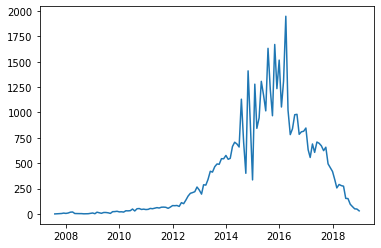

In [12]:
down_sampled_df.issue_d=pd.to_datetime(down_sampled_df.issue_d)
time_df=down_sampled_df.set_index('issue_d')
time_df=time_df.resample('M').count()
plt.plot(time_df.index,time_df.term)